In [1]:
# Connect google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
main_datasets_path = '/content/drive/MyDrive/AVD/Trabajos_3_4/Datasets/'

# Aplicando métricas de evaluación en Deep Learning

En este notebook se van a aplicar diferentes métricas de evaluación de las más empleadas en diferentes problemas que pueden resolverse mediante aplicación de redes neuronales. Especifícamente se van a analizar problemas relativos a procesado de imagen (detección de objetos, segmentación, detección de keypoints), procesado de texto (análisis de textos generados) y métricas para medir como de buenas son imágenes generadas por una red neuronal generativa. Se van a proporner diferentes datos de partida en cada caso y se propone que se apliquen las métricas vistas en clase empleando código proporcionado u otro código desarrollado por el alumnos. No es necesario aplicar las métricas desde cero, es decir, si se conocen, pueden aplicarse librerías existentes siempre y cuando se apliquen de manera correcta. La idea fundamental es aplicar las mñetricas a los datos proporcionados y las etiquetas generadas y comentar en detalle todos los resultados que se obtengan.

## 1. Métricas para tareas de procesado de imagen

En este primer apartado se van a tratar diferentes problemas de procesado de imagen de cara a obtener métricas que permitan medir como de buenos son los resultados predichos por alguna red neuronal en comparación con las etiquetas usadas para la comparación. En este apartado vamos a tratar tres problemas principales: Detección de objetos, segmentación y detección de puntos clave (keypoints). Para este apartado se han proporcionado unas imagenes en la carpeta en Drive con nombre "Images_to_annotate" dónde se encuentran tres carpetas: object_detection, segmentation, pose. Las tareas a realizar son las siguientes:

1. Los datos proporcionados se encuentran sin anotaciones. Debe anotar manualmente estas imágenes para proprocionar las etiquetas de cara a aplicar las métricas que considere oportunas. En los siguientes apartados se detallará el proceso de anotación para realizarlo adecuadamente en cada problema a tratar.

2. Una vez anotados debe seleccionar en cada problema las métricas de interés a aplicar en cada caso.

3. Aplique las métricas seleccionadas imagen por imagen. Analice en detalle que sucede con cada una de ellas.

4. Aplique las métricas de manera global, es decir, a todas las imágenes de cara a obtener una métrica global que represente los resultados suponiendo que las imágenes proporcionadas componen el dataset de validación de nuestro modelo.

### 1.1 Métricas para detección de objetos

En primer lugar se deben anotar las imágenes proporcionadas en la carpeta "object_detection" para tener las etiquetas reales a analizar con las métricas seleccionadas. Para ello debe realizar este proceso de manera manual empleando alguna herramienta de anotación existente o seleccionado adecuadamente los píxeles necesarios que conformen la anotación. En el caso de detección de objetos nos interesa anotar el "bounding box" de cada objeto de interés así como la "clase" de ese objeto. En este apartado se va a emplear el algoritmo YOLOv8 en diferentes versiones que permiten la detección de diferentes objetos en la imagen de diferentes maneras. En este caso usaremos YOLOv8 como detector de objetos y sabemos previamente que dado que usaremos el modelo preentrenado proporcionado por la librerías que contiene el modelo este se encuentra preentrenado en el dataset COCO. Puede encontrar las clases y el índice correspondiente a cada una en el siguiente enlace:

https://docs.ultralytics.com/es/datasets/detect/coco/#dataset-yaml

Las imágenes proporcionadas para anotar contienen todas objetos que existen en el dataset COCO (si esto no fuera así no podríamos evaluarlas pues el algoritmo no sería capaz de detectarlas). Por ello se proporciona a continuación el detalle de que objetos se deberían anotar y de que manera en cada imagen.

Primero debemos saber que necesitamos anotar en estos datos. Como se ha mencionado anotaremos bounding boxes. Para ello tenemos varios formas de hacerlo, fijémonos en el siguiente gráfico:

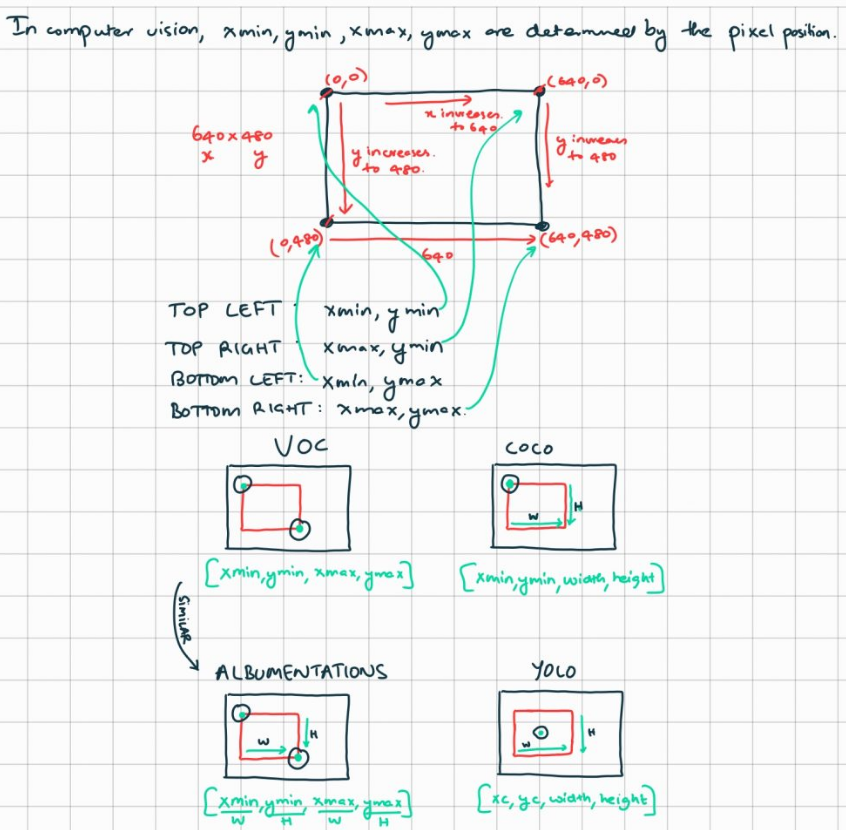

Para definir un bounding box tenemos diferentes maneras, por un lado podemos anotar la esquina superior izquierda y la esquina inferior derecha, dado que es un rectángulo este queda totalmente definido con estas coordenadas. Otra forma puede ser anotar la esquina superior izquierda y el centro del bounding box, de nuevo, como sabemos que es un rectángulo este queda completamente definido con estos parámetros. YOLOv8 proporciona detecciones en estos dos formatos directamente tras la predicción por lo que para facilitar la anotación podemos usar la anotación del primer caso mediante la esquina superior iaquierda y la esquina inferior derecha. La mayoría de herramientas existentes para anotación te permiten dibujar el bounding box de esta manera por lo que resulta la más útil y sencilla de emplear. Entonces se propone anotar las siguientes imágenes con las siguientes clases.

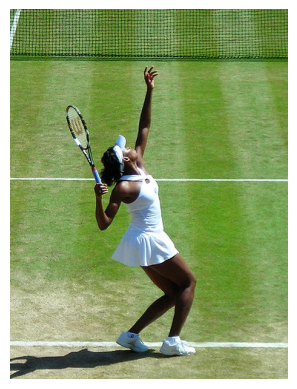

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_path = main_datasets_path+'Images_to_annotate/object_detection/1.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') # Hide axes for better visualization
plt.show()

En este caso anotaremos la raqueta y la persona con las etiquetas "tennis racket" y "person".

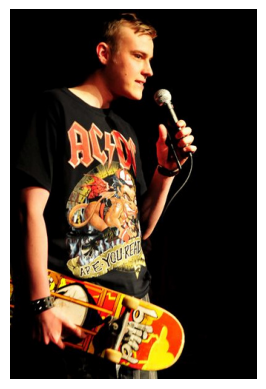

In [4]:
image_path = main_datasets_path+'Images_to_annotate/object_detection/2.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') # Hide axes for better visualization
plt.show()

Aquí anotaremos a la persona con "person" y el monopatín con "skateboard".

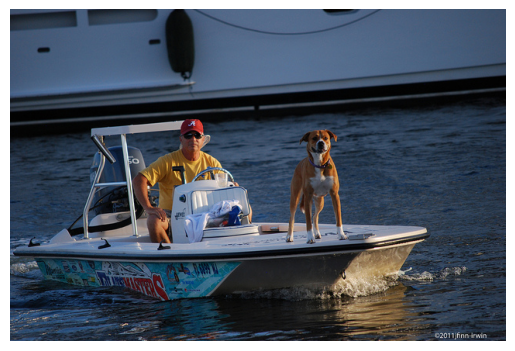

In [5]:
image_path = main_datasets_path+'Images_to_annotate/object_detection/3.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') # Hide axes for better visualization
plt.show()

Aquí vamos a anotar la persona con "person", el perro con "dog" y el barco con "boat".

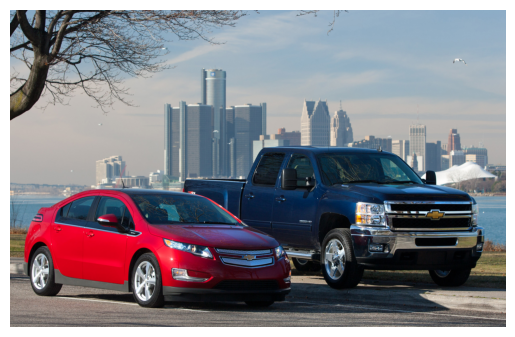

In [6]:
image_path = main_datasets_path+'Images_to_annotate/object_detection/4.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') # Hide axes for better visualization
plt.show()

En este caso anotaremos los dos coches cada uno con la etiqueta "car".

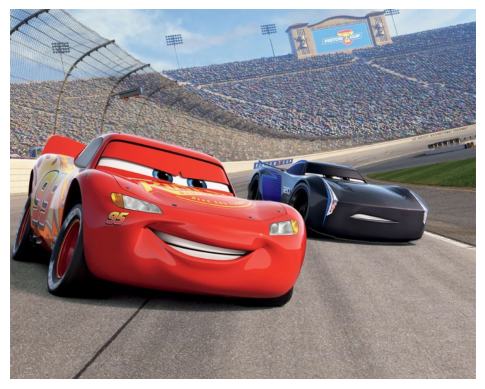

In [7]:
image_path = main_datasets_path+'Images_to_annotate/object_detection/5.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') # Hide axes for better visualization
plt.show()

Al igual que antes anotaremos los dos coches con la etiqueta "car".

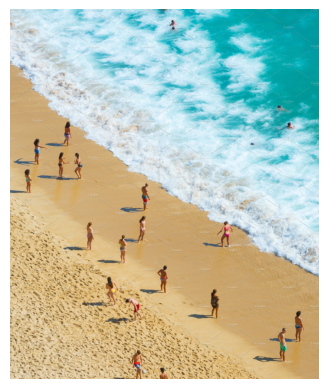

In [8]:
image_path = main_datasets_path+'Images_to_annotate/object_detection/6.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') # Hide axes for better visualization
plt.show()

Este caso es más complejo dónde anotaremos todas las personas presentes en la imagen con la etiqueta "person".

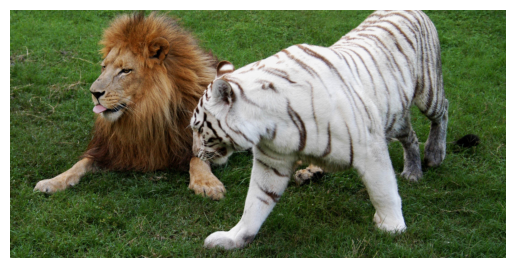

In [9]:
image_path = main_datasets_path+'Images_to_annotate/object_detection/7.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') # Hide axes for better visualization
plt.show()

Aquí vamos a anotar el león con "lion" y el tigre con "tiger". Este caso es epecial pues ni la etiqueta "tiger" ni "lion" existen en el dataset. Simplemente se va a anlizar que sucede cuando no existen estas etiquetas y ver si el algoritmo predice algún resultado.

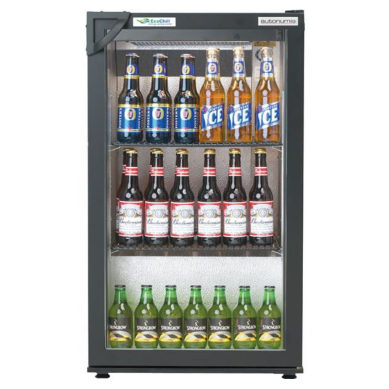

In [10]:
image_path = main_datasets_path+'Images_to_annotate/object_detection/8.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') # Hide axes for better visualization
plt.show()

En este caso se anotarán todas las botellas como "bottle" y el frigorífico que las contiene como "refrigerator".

Utilice cualquier herramienta que considere orpotuna para la anotación (se recomienda el uso de CVAT que es gratuita) en el formato comentado y almacene esta información como crea oportuno (txt, csv...). Recuerde que la anotación debería contener las coordenadas x e y de la coordenada superior izquierda y las coordenadas x e y de la inferior derecha así como el nombre de la clase en base a los nombres proporcionados.

*** Importante: debe proporcionar su archivo de anotaciones a la hora de la entrega además del notebook con los desarrollos y explicaciones de los resultados.

Una vez anotados los datos ya puede aplicar las métricas de evaluación que considere oportunas. Para ello revise la documentación de la asignatura y seleccione todas aquellas que crea relevantes para el análisis (destacar que la métrica principal debería ser el mAP). Realice un análisis imagen por imagen aplicando el algoritmo de detección de objetos YOLOv8 para obtener las predicciones y comprobar que se detecta y si corresponde con las anotaciones. Aplique las métricas seleccionadas a cada imagen de manera independiente y comente en celdas de texto los resultados obtenidos detallando los valores numéricso y todos lo que observe en cuanto a las detecciones en comparación con sus etiquetas. Incorpore todos los gráficos o imágenes que consiere oportunas.

In [11]:
# Desarrolle aquí el código para las predicciones y añada las celdas de texto necesarias para las explicaciones

In [12]:
!pip install ultralytics
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Tras subir al Drive la carpeta con la información de los bounding boxes que hemos hecho en CVAT, definimos la ruta a dicha carpeta.

In [13]:
annotations_path = '/content/drive/MyDrive/anotaciones/obj_train_data/'
images_path = main_datasets_path + 'Images_to_annotate/object_detection/'


Definimos el modelo YOLO para detección de objetos y vemos cómo pone los distintos bounding boxes sobre las imágenes proporcionadas.

In [14]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator
from google.colab.patches import cv2_imshow
import glob
import random

100%|██████████| 83.7M/83.7M [00:00<00:00, 240MB/s]



0: 448x640 1 person, 2 boats, 1 dog, 2618.8ms
Speed: 4.0ms preprocess, 2618.8ms inference, 3488.9ms postprocess per image at shape (1, 3, 448, 640)


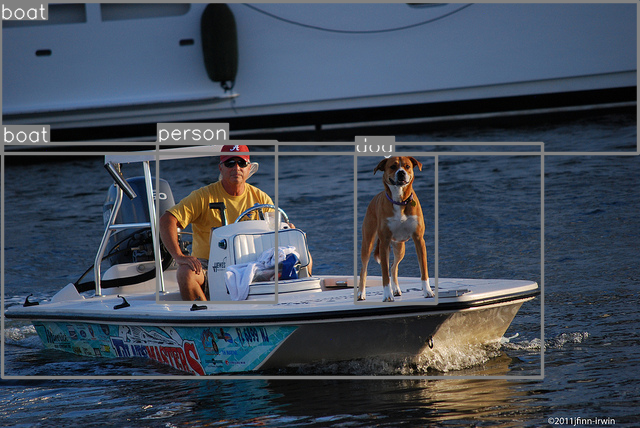

In [15]:
model = YOLO('yolov8l.pt')

# get random image
images_paths = sorted(glob.glob(images_path + "*.jpg"))
annot = sorted(glob.glob(annotations_path+"*.txt"))

path = images_paths[2]
path_labels = annot[2]


frame = cv2.imread(path)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
results = model.predict(img)

labels_pred = []
coords_pred = []
scores_pred = []

for r in results:
    annotator = Annotator(frame)
    boxes = r.boxes
    for box in boxes:
        b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
        c = box.cls
        conf = box.conf
        coords_pred.append(b.tolist())
        labels_pred.append(c.tolist())
        scores_pred.append(conf.tolist())
        annotator.box_label(b, model.names[int(c)])

frame2 = annotator.result()
cv2_imshow(frame2)

In [16]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

Realizamos un mapeo donde las claves del diccionario son la posición en la que se encuentran las clases anotadas en el fichero obj.names, el cual se ha obtenido tras descargarnos las anotaciones desde CVAT. Los valores son las etiquetas de YOLO. Dichos valores se obtienen mirando la celda anterior. Hay que destacar también que aquellas clases no detectadas como por ejemplo lion, han sido asignadas el número 80, que como se ve en la celda anterior no se corresponde con nada.

In [17]:
cvat_mapping = { 0 : 2, 2 : 0, 6 : 80, 7 : 80 , 1 : 8, 8 : 39,  9 : 72, 5 : 16, 4 : 36 , 3 : 38}

labels_pred = [int(item[0]) for item in labels_pred]
scores_pred = [float(i[0]) for i in scores_pred]

print(labels_pred)
print(coords_pred)
print(scores_pred)

[16, 0, 8, 8]
[[355.0802001953125, 154.71044921875, 436.82513427734375, 303.23236083984375], [157.51971435546875, 141.73284912109375, 276.13128662109375, 302.7218017578125], [2.7188720703125, 143.5487060546875, 542.8358154296875, 377.5501708984375], [0.9783935546875, 1.0264739990234375, 638.755615234375, 153.30859375]]
[0.9295986294746399, 0.9049316644668579, 0.9043083786964417, 0.6645313501358032]


In [18]:
files = sorted(os.listdir(annotations_path))

# Seleccionar el archivo de anotaciones correspondiente
file_path = os.path.join(annotations_path, os.path.basename(path).replace(".jpg", ".txt"))

label_numbers = []
coords = []

# Abrir el archivo de anotaciones y leer las líneas
with open(file_path, 'r') as file:
    for line in file:
        parts = line.strip().split()

        # Filtrar etiquetas específicas (6 y 7 en este caso)
        if int(parts[0]) in range(6, 8):
            continue

        # El primer número es la etiqueta
        label_numbers.append(int(parts[0]))

        # Las coordenadas son el resto de los números convertidos a float
        coords.append([float(part) for part in parts[1:]])


labels = [cvat_mapping[i] for i in label_numbers]

Tras observar que las coordenadas de CVAT estaban normalizadas y las de YOLO no había que desnormalizar las coordenadas de CVAT o normalizar las de YOLO. Finalmente, nos hemos decantado por la primera opción.

In [19]:
def denormalize_coords(coords, img_width, img_height):
    coords_abs = []
    for coord in coords:
        x_center = coord[0] * img_width
        y_center = coord[1] * img_height
        width = coord[2] * img_width
        height = coord[3] * img_height
        x_min = x_center - (width / 2)
        y_min = y_center - (height / 2)
        x_max = x_center + (width / 2)
        y_max = y_center + (height / 2)
        coords_abs.append([x_min, y_min, x_max, y_max])
    return coords_abs

img_width = frame.shape[1]
img_height = frame.shape[0]
coords_abs = denormalize_coords(coords, img_width, img_height)

In [20]:
coords_abs = [[round(coord, 2) for coord in box] for box in coords_abs]

Finalmente, realice un análisis global, es decir obtengas las métricas globales suponiendo que todas las imágenes proporcionadas conforman un dataset de evaluación. Para esto tendrá que recorrer imagen por imagen obteniendo las predicciones con YOLOv8 y obteniendo las métricas que permitan la representación final de todo el dataset conjunto. Analice sus resultados y si estos son coherentes con el análisis previo realizado. Comente todos los detalles en celdas de texto dentro del notebook. Incorpore todos los gráficos o imágenes que consiere oportunas.

In [21]:
# Desarrolle aquí el código para las predicciones y añada las celdas de texto necesarias para las explicaciones

In [22]:
from torch import tensor
from torchmetrics.detection import MeanAveragePrecision

# Two dicts each one corresponding to each simulated image detections
preds = [
   dict(
     boxes= tensor(coords_pred),
     scores=tensor(scores_pred),
     labels= tensor(labels_pred),
   )
]

# Two dicts each one corresponding to each simulated image with the real annotated targets
target = [
   dict(
     boxes=tensor(coords_abs),
     labels=tensor(labels),
   )
]

metric = MeanAveragePrecision(iou_type="bbox")
metric.update(preds, target)
from pprint import pprint
pprint(metric.compute())

{'classes': tensor([ 0,  8, 16], dtype=torch.int32),
 'map': tensor(0.8000),
 'map_50': tensor(1.),
 'map_75': tensor(0.6667),
 'map_large': tensor(0.8000),
 'map_medium': tensor(-1.),
 'map_per_class': tensor(-1.),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.8000),
 'mar_10': tensor(0.8000),
 'mar_100': tensor(0.8000),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.8000),
 'mar_medium': tensor(-1.),
 'mar_small': tensor(-1.)}


Tras aplicar MAP a 2 imágenes, vemos como obtenemos un valor alto lo que supone que las anotaciones se han hecho bien y que el mapeo también parece estar bien.

### 1.2 Métricas para segmentación

En este apartado se va a realizar un análisis similar al anterior pero ahora atendiendo a un caso de segmentación de instancias. Para ello se va a aplicar YOLOv8 para segmentación de instancias el cual va a proporcionar unas máscaras con la información de la forma de los objetos detectados. De nuevo, no se proporcionan etiquetas por lo que tendrá que anotar los datos de manera manual. Este caso es más complejo pues el bounding box sólo requería de dos puntos para ser definido mientras que para la segmentación se necesitan numerosos puntos interconectados que definan lo mas fielmente posible la forma del objeto. Por tanto, par anotar una segmentación se debe realizar lo siguiente:

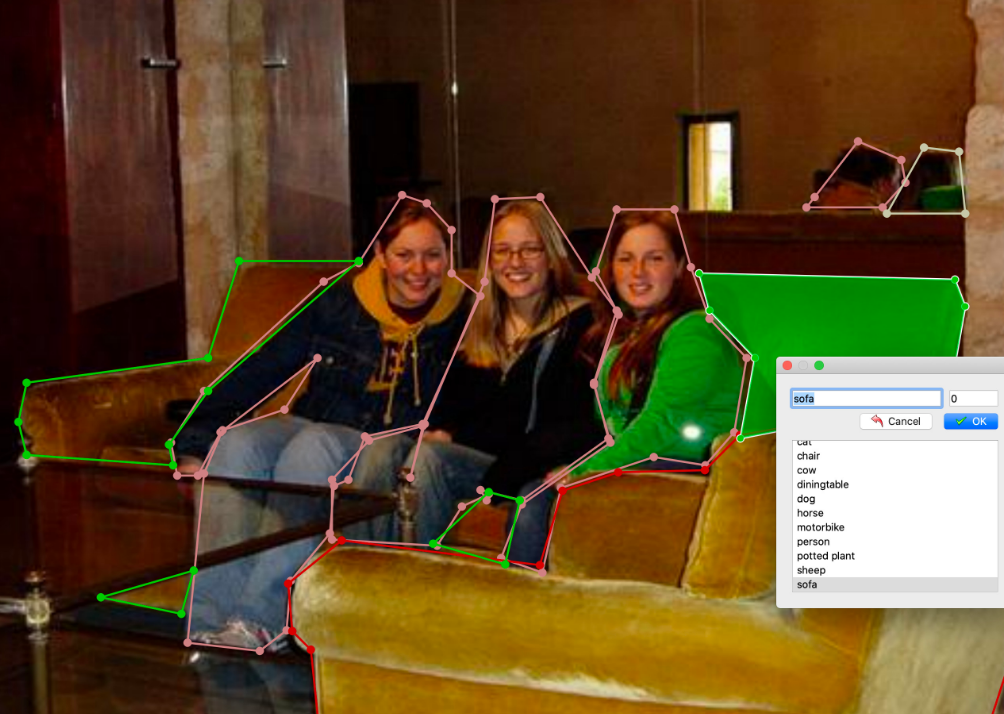

1. Seleccionar el objeto a anotar.
2. Crear una forma poligonal alrededor del mismo.
3. Anotar la clase.
4. Nota: no es necesario anotar el bounding box pues este queda definido por los puntos anotados más lejanos en las 4 direcciones de la imagen.

Se proporciona una carpeta "sementations" con las imágenes a anotar para este caso de estudio que son las mismas que en el caso anterior por lo que puede utilizar las carpetas indistintamente. Anote estas imágenes con las segmentaciones y las mismas clases que se proponían en el caso anterior para detección de objetos.

Utilice cualquier herramienta que considere orpotuna para la anotación (se recomienda el uso de CVAT que es gratuita) en el formato comentado y almacene esta información como crea oportuno (txt, csv...). Recuerde que la anotación debería contener las coordenadas de los puntos de coordenadas x,y que definen la forma del objeto anotado.

*** Importante: debe proporcionar su archivo de anotaciones a la hora de la entrega además del notebook con los desarrollos y explicaciones de los resultados.

Una vez anotadas las segmentaciones seleccione las métricas que considere oportunas vistas en clase para obtener como de buenas son las anotaciones con respecto a las predicciones del algoritmo. En esta primer parte analice imagen a imagen los resultados para entender que sucede en cada uno de ellos y describa todos lo que observe en detalle en diferentes celdas de texto. Incorpore todos los gráficos o imágenes que consiere oportunas.

*** Nota: Esta evaluación es más compleja pues se deben conocer las segmentaciones anotadas a comparar con las segmentaciones del objeto predicho. Para ello puede calcular el IoU entre todas las instancias de segmentación con todas las anotaciones y asociar aquellas que superen un cierto umbral, por ejemplo >=0.5.

In [23]:
# Desarrolle aquí el código para las predicciones y añada las celdas de texto necesarias para las explicaciones

Repetimos el procedimiento que hicimos en el apartado anterior subiendo al drive el json con la información sobre las anotaciones de segmentación realizadas en CVAT. En este caso, se obtiene un json al descargarlo desde CVAT ya que el formato elegiddo para la descarga es COCO 1.0 y antes era YOLO 1.1.

In [24]:
puntos_path = '/content/drive/MyDrive/instances_default1.json'


In [25]:
import json
with open(puntos_path) as puntos_json:
  puntos = json.load(puntos_json)

puntos

{'licenses': [{'name': '', 'id': 0, 'url': ''}],
 'info': {'contributor': '',
  'date_created': '',
  'description': '',
  'url': '',
  'version': '',
  'year': ''},
 'categories': [{'id': 1, 'name': 'tennis racket', 'supercategory': ''},
  {'id': 2, 'name': 'skateboard', 'supercategory': ''},
  {'id': 3, 'name': 'bottle', 'supercategory': ''},
  {'id': 4, 'name': 'refrigerator', 'supercategory': ''},
  {'id': 5, 'name': 'person', 'supercategory': ''},
  {'id': 6, 'name': 'dog', 'supercategory': ''},
  {'id': 7, 'name': 'boat', 'supercategory': ''},
  {'id': 8, 'name': 'car', 'supercategory': ''},
  {'id': 9, 'name': 'lion', 'supercategory': ''},
  {'id': 10, 'name': 'tiger', 'supercategory': ''}],
 'images': [{'id': 1,
   'width': 375,
   'height': 500,
   'file_name': '1.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 2,
   'width': 333,
   'height': 500,
   'file_name': '2.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',


En este caso, el modelo YOLO que hemos usado es el de segmentación. Al igual que hicimos para la detección de objetos imprimimos las imágenes y vemos que se obtienen algunos bounding boxes distintos por usar este otro tipo de YOLO.

In [97]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator
from google.colab.patches import cv2_imshow
import glob


model = YOLO('yolov8x-seg.pt')  # load an official model

images = sorted(os.listdir(images_path))
# Seleccionamos una imagen random de todas las disponibles como ejemplo


labels_pred = []
coords_pred = []
scores_pred = []

for i in images:
  frame = cv2.imread(images_path + i)
  img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  results = model.predict(img)
  print(img.shape)
  for r in results:
      annotator = Annotator(frame)
      boxes = r.boxes
      for box in boxes:
          b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
          c = box.cls
          annotator.box_label(b, model.names[int(c)])
          conf = box.conf
          coords_pred.append(b.tolist())
          labels_pred.append(c.tolist())
          scores_pred.append(conf.tolist())
          annotator.box_label(b, model.names[int(c)])

  frame = annotator.result()
  cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.

In [98]:
shapes=[]
areas=[]
segmentacion=[]
bbox=[]
image_id=[]
category_id=[]
for i in puntos['images']:
  shapes.append([i['width'],i['height']])

for a in puntos['annotations']:
  areas.append(a['area'])
  segmentacion.append(a['segmentation'])
  bbox.append(a['bbox'])
  image_id.append(a['image_id'])
  category_id.append(a['category_id'])

In [99]:
import numpy as np
#segmentacion[0][0]
seg=[]
#len(image_id)==len(segmentacion)
for i in range(len(segmentacion)):
  seg.append(segmentacion[i][0])

seg[0]

[116.4,
 234.21,
 110.35,
 212.28,
 96.32,
 190.35,
 85.79,
 177.19,
 78.77,
 157.89,
 75.26,
 134.21,
 83.16,
 128.07,
 96.32,
 138.6,
 103.33,
 157.02,
 108.6,
 177.19,
 106.84,
 187.72,
 110.35,
 200.0,
 119.91,
 221.05,
 125.26,
 236.84,
 117.37,
 233.33]

In [100]:
from collections import Counter

counter= Counter(image_id)
sorted_counter = dict(sorted(counter.items()))

# Imprimir el diccionario ordenado
print(sorted_counter) #imprime numero de veces que he hecho segmentacion en una imagen
sum(list(sorted_counter.values()))==len(seg)

{1: 2, 2: 2, 3: 3, 4: 2, 5: 2, 6: 21, 7: 2, 8: 20}


True

In [101]:
labels_pred = [int(item[0]) for item in labels_pred]


In [102]:
labels_true=[]
for i in puntos['categories']:
  labels_true.append(i['name'])
labels_true

['tennis racket',
 'skateboard',
 'bottle',
 'refrigerator',
 'person',
 'dog',
 'boat',
 'car',
 'lion',
 'tiger']

In [103]:
print(labels_pred)
print(category_id)
print(image_id)
len(category_id)

[0, 38, 0, 36, 16, 0, 8, 16, 2, 7, 14, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 16, 18, 72, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]
[1, 5, 2, 5, 6, 7, 5, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4]
[1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


54

Definimos un nuevo mapeo atendiendo a los valores de category id que se corresponden con las clases anotadas en CVAT. Estos valores serán las claves del diccionario. En cuantos a los valores del diccionario, nuevamente nos fijamos en el model.names que usamos previamente

In [104]:
cvat_mapping1={1:38,2:36,3:39,4:72,5:0,6:8,7:16,8:2,9:80,10:80,11:80}

Obtenga ahora las métricas de segmentación de manera global como si las imágenes anotadas conformaran un dataset de evaluación para comprobar los resultados de manera como se haría en un caso real. Obtenga las métricas que ha seleccionado para el caso global y comente los resultados de manera detallada en celdas de texto adicionales que incluya. Incorpore todos los gráficos o imágenes que consiere oportunas. Para ello lo que puede hacer es calcular las métricas seleccionadas para cada segmentación que vincuale a una anotación con el IoU y finalmente promediar este resultado entre todas las isntancias de todas las imágenes.

In [105]:
# Desarrolle aquí el código para las predicciones y añada las celdas de texto necesarias para las explicaciones

In [106]:
def segmentation_quality(y_true_seg, y_pred_seg):
    """
    Calcula la Precisión de Segmentación (SQ) para la segmentación panóptica.

    Parámetros:
    - y_true_seg: array de numpy con las etiquetas verdaderas de segmentación semántica.
    - y_pred_seg: array de numpy con las predicciones del modelo de segmentación semántica.

    Retorna:
    - sq: la Precisión de Segmentación (SQ).
    """
    # Calcular verdaderos positivos (TP), falsos positivos (FP) y falsos negativos (FN) para segmentación semántica
    intersection = np.logical_and(y_true_seg, y_pred_seg)
    union = np.logical_or(y_true_seg, y_pred_seg)
    tp = np.sum(intersection)
    fp = np.sum(np.logical_and(np.logical_not(y_true_seg), y_pred_seg))
    fn = np.sum(np.logical_and(y_true_seg, np.logical_not(y_pred_seg)))

    # Calcular la Precisión de Segmentación (SQ)
    sq = tp / (tp + 0.5 * (fp + fn))

    return sq

import numpy as np

def instance_quality(y_true_det, y_pred_det):
    """
    Calcula la Precisión de Detección de Instancias (IQ) para la segmentación panóptica.

    Parámetros:
    - y_true_det: array de numpy con las etiquetas verdaderas de detección de instancias.
    - y_pred_det: array de numpy con las predicciones del modelo de detección de instancias.

    Retorna:
    - iq: la Precisión de Detección de Instancias (IQ).
    """
    # Asegurarse de que los arrays son de tipo numpy
    y_true_det = np.asarray(y_true_det)
    y_pred_det = np.asarray(y_pred_det)

    # Verificar que y_true_det y y_pred_det tienen la misma forma
    if y_true_det.shape != y_pred_det.shape:
        raise ValueError("y_true_det y y_pred_det deben tener la misma forma")

    # Calcular verdaderos positivos (TP), falsos positivos (FP) y falsos negativos (FN) para detección de instancias
    tp = np.sum((y_true_det == y_pred_det) & (y_true_det > 0))
    fp = np.sum((y_true_det == 0) & (y_pred_det > 0))
    fn = np.sum((y_true_det > 0) & (y_pred_det == 0))

    # Calcular la Precisión de Detección de Instancias (IQ)
    if tp + 0.5 * (fp + fn) == 0:
        return 0.0

    iq = tp / (tp + 0.5 * (fp + fn))

    return iq



def panoptic_quality(y_true_seg, y_pred_seg, y_true_det, y_pred_det):
    """
    Calcula la Calidad Panóptica (PQ) para la segmentación panóptica.

    Parámetros:
    - y_true_seg: array de numpy con las etiquetas verdaderas de segmentación semántica.
    - y_pred_seg: array de numpy con las predicciones del modelo de segmentación semántica.
    - y_true_det: array de numpy con las etiquetas verdaderas de detección de instancias.
    - y_pred_det: array de numpy con las predicciones del modelo de detección de instancias.

    Retorna:
    - pq: la Calidad Panóptica (PQ).
    """
    # Calcular la Precisión de Segmentación (SQ)
    sq = segmentation_quality(y_true_seg, y_pred_seg)

    # Calcular la Precisión de Detección de Instancias (IQ)
    iq = instance_quality(y_true_det, y_pred_det)

    # Calcular la Calidad Panóptica (PQ)
    pq = (sq * iq) / (2 * sq + iq)

    return pq

Dado que YOLO detecta más clases, introducimos los valores necesarios para que tengan la misma longitud. Estos valores en el mapeo se asocian al valor 80 que no se encuentra en model.names.

In [107]:
for i in range(5):
  category_id.append(11)


In [108]:

labels_seg = [cvat_mapping1[i] for i in category_id]


In [109]:
print(labels_pred)
print(labels_seg)
print(image_id)
print(category_id)


[0, 38, 0, 36, 16, 0, 8, 16, 2, 7, 14, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 16, 18, 72, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]
[38, 0, 36, 0, 8, 16, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 80, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 72, 80, 80, 80, 80, 80]
[1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[1, 5, 2, 5, 6, 7, 5, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 11, 11, 11, 11, 11]


In [110]:
cvat_mapping1

{1: 38, 2: 36, 3: 39, 4: 72, 5: 0, 6: 8, 7: 16, 8: 2, 9: 80, 10: 80, 11: 80}

In [111]:
# Ejemplo de uso
y_true_labels = np.array(labels_seg)

y_pred_labels = np.array(labels_pred)



iq=instance_quality(y_true_labels,y_pred_labels)
print('La precisión de detección de instancias es: ',iq)

La precisión de detección de instancias es:  0.7


Hemos elegido la métrica de IQ que mide la precisión en la detección de instancias, obteniendo un valor de 0.7

### 1.3 Métricas para detección de Keypoints

Para finalizar este apartado se propone el análisis de métricas se evaluación para detección de puntos clave en imagen. Estas métricas permitiran comparar como de buenas son las estimaciones de estos puntos con respecto a las anotaciones proporcionadas. Para ello se proporcionan 5 imágenes en la carpeta "pose" dónde se proponen diferentes casos de estudio. La idea fundamental es analizar los resultados mediante métricas de evaluación. De nuevo, no se proporcionan las anotaciones de los puntos clave por lo que deberá anotarlos manualmente mediante alguna aplicación que lo permita como CVAT. En este caso la anotación es mucho mñas compleja que anteriormente por lo que se detalla a continuación como debe ser realizada.

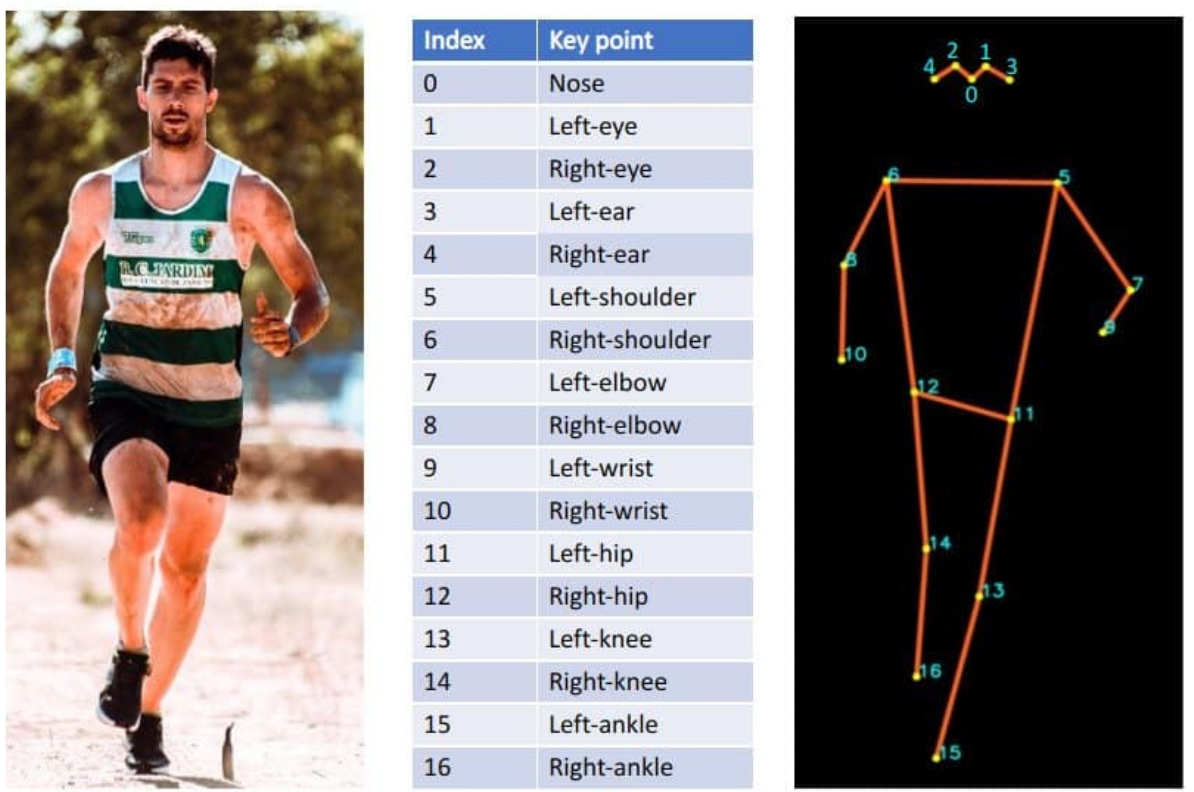

Como se observa en la imagen anterior, YOLOv8 para deteción de puntos en el esqueleto está entrenado en el dataset COCO para esta tarea. El número de puntos a anotar por persona es 17 y siguen el esquema anterior. Por lo tanto debe seguir esta notación para que se puedan evaluar de manera correcta. De nuevo la herramienta CVAT proporciona un apartado para anotar esqueletos por lo que puede emplearla para este propósito.

Cabe destacar algo importante, ¿qué pasa si alguna parte del cuerpo no está visible?. En este caso no podríamos anotar algunos puntos y la anotación quedaría incompleta. En el formato COCO, cada punto clave (keypoint) puede tener uno de tres estados: visible y marcado, no visible pero presente en la imagen, y no marcado porque la parte del cuerpo no está en la imagen. Si sabes que una parte del cuerpo está presente pero no es visible (por ejemplo, está oculta detrás de un objeto), puedes marcar este punto como no visible. Si la parte del cuerpo directamente no está en la imagen (por ejemplo, cortada por el borde de la imagen), entonces no marques ese punto en absoluto.

De nuevo la herramineta CVAT permite la anotación de esqueletos por lo que tenga como refrencia el siguiente enlace:

https://opencv.github.io/cvat/docs/manual/advanced/skeletons/

*** Importante: debe proporcionar su archivo de anotaciones a la hora de la entrega además del notebook con los desarrollos y explicaciones de los resultados.

Una vez anotados los esqueletos seleccione las métricas de análisis apliquélas sobre las detecciónes que obtenga mediante el algoritmo YOLOv8 y proporcione los resultados de manera global sobre todas las imágenes proprocionadas. Dado que esta evaluación es más complejar haga uso de la librería "pycocotools" u otras que consere oportunas. Esta librería proporciona directamente los métodos para el calculo proporcionando dos archivos en formato diccionario de las etiquetas y las predicciones.

*** Tenga en cuenta que esta evaluación es compleja pues se debe saber previamente que esqueleto se analiza de las predicciones para compararlo con el esqueleto adecuado de las etiquetas. Podría solucionar esto por ejemplo tomando el bounding box que rodea los Keypoints.

In [47]:
# Desarrolle aquí el código para las predicciones y añada las celdas de texto necesarias para las explicaciones

Definimos la ruta a las imágenes que usaremos para detectar las poses.

In [48]:
pose_path='/content/drive/MyDrive/AVD/Trabajos_3_4/Datasets/Images_to_annotate/pose/'

Al igual que en los apartados anteriores, usamos el modelo de YOLO que nos conviene. En este caso, es el modelo que detecta las poses.

In [60]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator
from google.colab.patches import cv2_imshow
import glob


model = YOLO('yolov8x-pose.pt')  # load an official model

images = sorted(os.listdir(pose_path))
# Seleccionamos una imagen random de todas las disponibles como ejemplo


labels_pred = []
coords_pred = []
scores_pred = []

for i in images:
  frame = cv2.imread(pose_path + i)
  img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  results = model.predict(img)
  print(img.shape)
  for r in results:
      annotator = Annotator(frame)
      boxes = r.boxes
      for box in boxes:
          b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
          c = box.cls
          annotator.box_label(b, model.names[int(c)])
          conf = box.conf
          coords_pred.append(b.tolist())
          labels_pred.append(c.tolist())
          scores_pred.append(conf.tolist())
          annotator.box_label(b, model.names[int(c)])

  frame = annotator.result()
  cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.

Subimos a Drive el json con la información de los keypoints de cada una de las 5 imágenes. La explicación de por qué se sube un json es la misma que en el caso de segmentación.

In [61]:
keypoints_path = '/content/drive/MyDrive/person_keypoints_default.json'


In [62]:
import json
with open(keypoints_path) as keypoints_json:
  keypoints = json.load(keypoints_json)

keypoints

{'licenses': [{'name': '', 'id': 0, 'url': ''}],
 'info': {'contributor': '',
  'date_created': '',
  'description': '',
  'url': '',
  'version': '',
  'year': ''},
 'categories': [{'id': 1,
   'name': 'esqueleto',
   'supercategory': '',
   'keypoints': ['1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '10',
    '11',
    '12',
    '13',
    '14',
    '15',
    '16',
    '17'],
   'skeleton': []}],
 'images': [{'id': 1,
   'width': 640,
   'height': 425,
   'file_name': '1.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 2,
   'width': 375,
   'height': 500,
   'file_name': '2.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 3,
   'width': 427,
   'height': 640,
   'file_name': '3.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 4,
   'width': 640,
   'height': 480,
   'file_name': '4.jpg',
   'license': 0,
   'fl

Almacenamos en listas la información que consideramos importante del json que se ha subido a Drive.

In [63]:
shapes1=[]
areas1=[]
segmentacion1=[]
bbox1=[]
image_id1=[]
category_id1=[]
keypoints_true=[]
for i in keypoints['images']:
  shapes1.append([i['width'],i['height']])

for a in keypoints['annotations']:
  areas1.append(a['area'])
  segmentacion1.append(a['segmentation'])
  bbox1.append(a['bbox'])
  image_id1.append(a['image_id'])
  category_id1.append(a['category_id'])
  keypoints_true.append(a['keypoints'])


In [64]:
len(keypoints_true[2])

51

In [65]:
labels_pred = [int(item[0]) for item in labels_pred]


In [66]:
print(labels_pred)
print(scores_pred)
print(coords_pred)

[0, 0, 0, 0, 0, 0]
[[0.9461240172386169], [0.9262120723724365], [0.9109252095222473], [0.935947060585022], [0.9336850047111511], [0.9271665811538696]]
[[280.0, 43.0, 497.0, 392.0], [112.0, 75.0, 253.0, 471.0], [157.0, 40.0, 263.0, 433.0], [378.0, 126.0, 594.0, 375.0], [215.0, 127.0, 387.0, 402.0], [41.0, 134.0, 228.0, 411.0]]


In [67]:
pip install pycocotools


## 2. Métricas de evaluación para texto

En este apartado se van a evaluar métricas de evaluación de texto para un caso especíco que es la traducción de texto de un idioma a otro. Para ello se van a proporcionar la frase original que debería traducirse y diferentes frase obtenidas con diferentes modelos. Estas frases predichas incorporan errores en diferentes niveles, es decir, unas frases serán muy buenas similares a la traducción original, otras tendrá palabras en un orden distinto pero con una misma información semánticas y otras serán traducciones menos efectivas. En un segundo caso se proporcionarán frases con errores léxicos dónde habrá palabras con letras faltantes o erróneas entre otros errores.

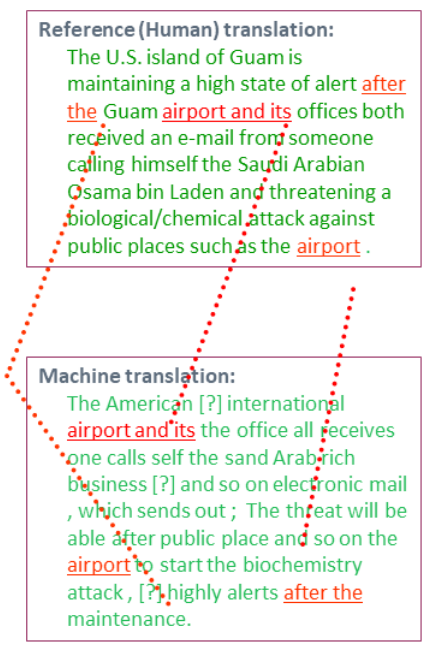

### 2.1 Métricas de evaluación para comparación entre frases

En este apartado debe seleccionar al menos dos métricas para comparación de frases de cara a evaluar su similitud. Una vez seleccionadas se proporciona una frase que es la anotación (frase original que debería traducirse) y una serie de frases con diferentes problemas en cuanto a la traducción. Aplique las métricas comparando la frase orginal con las predichas y analice y comente los resultados en detalle.

Frase de referencia:

- Reference: "In an increasingly digitalized world, the ability to quickly adapt to new technologies and processes is essential for success and innovation in any field."

Frases predichas con diferentes niveles de error:

- Almost Perfect: "In an increasingly digital world, the ability to adapt quickly to new technologies and processes is key for success and innovation in any area."
- Minor Errors: "In a more digital world, the capacity for quick adaptation to new technologies and processes is essential for success and innovation in all fields."
- Moderate Errors: "A digital world requires fast adaptation to new technologies and methods to achieve innovation and success in any sector."
- Severe Errors: "Digital world, adapting to new technology and processes essential for innovating and succeeding in fields."
- Very Different: "Innovation and success in the technology sector depend on the speed of adaptation to change."

In [ ]:
# Desarrolle el código con las métricas empleadas y comente los resultados

In [70]:
!pip install nltk

In [71]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

La primera métrica que vamos a utilizar es BLEU. Esta métrica puede tomar valores de 0 a 1. Cuanto más se acerque el valor obtenido a 1, la traducción será de mejor calidad.

In [72]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

reference = "In an increasingly digitalized world, the ability to quickly adapt to new technologies and processes is essential for success and innovation in any field."
# Frases predichas
pred1 = "In an increasingly digital world, the ability to adapt quickly to new technologies and processes is key for success and innovation in any area."
pred2 = "In a more digital world, the capacity for quick adaptation to new technologies and processes is essential for success and innovation in all fields."
pred3 = "A digital world requires fast adaptation to new technologies and methods to achieve innovation and success in any sector."
pred4 = "Digital world, adapting to new technology and processes essential for innovating and succeeding in fields."
pred5 = "Innovation and success in the technology sector depend on the speed of adaptation to change."

# Tokenización
reference_tokens = nltk.word_tokenize(reference.lower())
pred_tokens = [nltk.word_tokenize(pred.lower()) for pred in [pred1, pred2, pred3, pred4, pred5]]

# Función de suavizado
smooth = SmoothingFunction().method4

# Cálculo de BLEU con suavizado
bleu_scores_smooth = [sentence_bleu([reference_tokens], pred_tokens[i], smoothing_function=smooth) for i in range(5)]
print('El valor BLEU para el primer predicado es: ',bleu_scores_smooth[0])
print('El valor BLEU para el segundo predicado es: ',bleu_scores_smooth[1])
print('El valor BLEU para el tercer predicado es: ',bleu_scores_smooth[2])
print('El valor BLEU para el cuarto predicado es: ',bleu_scores_smooth[3])
print('El valor BLEU para el quinto predicado es: ',bleu_scores_smooth[4])


El valor BLEU para el primer predicado es:  0.5601658827714291
El valor BLEU para el segundo predicado es:  0.49692833205572384
El valor BLEU para el tercer predicado es:  0.12557500609601147
El valor BLEU para el cuarto predicado es:  0.043916492998528574
El valor BLEU para el quinto predicado es:  0.013682371998670048


Como se puede observar, los mejores valores se han obtenido para los primeros predicados ya que estos se asemejaban más al predicado original.

La segunda métrica que vamos a implementar es el ROUGE. Dentro de esta métrica hay distintas variantes que vamos a calcular. Las variantes que vamos a usar son: Rouge1, Rouge2 y RougeL. Rouge1 calcula el solapamiento de unigramas, Rouge 2 el solapamiento de bigramas y RougeL el solapamiento de los n-gramas más largos co-ocurrentes.

In [73]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=9249113592c00a42f7e17e06f563550b5aeb8fec65fd0c4e074235234408bf1a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [74]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)

# Cálculo de ROUGE
rouge_scores = [scorer.score(reference, pred) for pred in [pred1, pred2, pred3, pred4, pred5]]
rouge_scores


[{'rouge1': Score(precision=0.9166666666666666, recall=0.9166666666666666, fmeasure=0.9166666666666666),
  'rouge2': Score(precision=0.7391304347826086, recall=0.7391304347826086, fmeasure=0.7391304347826085),
  'rougeL': Score(precision=0.875, recall=0.875, fmeasure=0.875)},
 {'rouge1': Score(precision=0.75, recall=0.75, fmeasure=0.75),
  'rouge2': Score(precision=0.6086956521739131, recall=0.6086956521739131, fmeasure=0.6086956521739131),
  'rougeL': Score(precision=0.75, recall=0.75, fmeasure=0.75)},
 {'rouge1': Score(precision=0.6842105263157895, recall=0.5416666666666666, fmeasure=0.6046511627906976),
  'rouge2': Score(precision=0.3333333333333333, recall=0.2608695652173913, fmeasure=0.2926829268292683),
  'rougeL': Score(precision=0.5263157894736842, recall=0.4166666666666667, fmeasure=0.46511627906976744)},
 {'rouge1': Score(precision=0.9333333333333333, recall=0.5833333333333334, fmeasure=0.7179487179487181),
  'rouge2': Score(precision=0.5, recall=0.30434782608695654, fmeasure

Al igual que con BLEU, los primeros predicados obtienen mejores valores .

Ahora se va a realizar un análisis similar al anterior pero dónde las frases predichas continen errores grámaticales (palabras mal escritas, letras faltantes...). Aplique de nuevo las mñetricas anteriores en etos casos y detalle los resultados sobre las siguientes frases:

Frase de referencia:

- Referencia: "Space exploration opens up new horizons for humanity."

Frases predichas con diferentes niveled de error:

- Casi Perfecta: "Space exploration opens new horizons for humanity."
- Errores Menores: "Spce exploration opens up new horizons for humanity."
- Errores Moderados: "Space explortion opens up new horizons for humans."
- Errores Graves: "Spaec exploratoin opnes up new horizons for humanity."
- Muy Diferente: "Exploration of space brings new horizons to people."


In [75]:
# Desarrolle el código con las métricas empleadas y comente los resultados

In [76]:
reference = "Space exploration opens up new horizons for humanity."
# Frases predichas
pred1 = "Space exploration opens new horizons for humanity."
pred2 = "Spce exploration opens up new horizons for humanity."
pred3 = "Space explortion opens up new horizons for humans."
pred4 = "Spaec exploratoin opnes up new horizons for humanity."
pred5 = "Exploration of space brings new horizons to people."

# Tokenización
reference_tokens = nltk.word_tokenize(reference.lower())
pred_tokens = [nltk.word_tokenize(pred.lower()) for pred in [pred1, pred2, pred3, pred4, pred5]]

# Cálculo de BLEU
bleu_scores_smooth = [sentence_bleu([reference_tokens], pred_tokens[i], smoothing_function=smooth) for i in range(5)]
print('El valor BLEU para el primer predicado es: ',bleu_scores_smooth[0])
print('El valor BLEU para el segundo predicado es: ',bleu_scores_smooth[1])
print('El valor BLEU para el tercer predicado es: ',bleu_scores_smooth[2])
print('El valor BLEU para el cuarto predicado es: ',bleu_scores_smooth[3])
print('El valor BLEU para el quinto predicado es: ',bleu_scores_smooth[4])


El valor BLEU para el primer predicado es:  0.6101950432112578
El valor BLEU para el segundo predicado es:  0.8633400213704505
El valor BLEU para el tercer predicado es:  0.4854917717073234
El valor BLEU para el cuarto predicado es:  0.5873949094699213
El valor BLEU para el quinto predicado es:  0.07948346282299562


En este caso, podemos observar como el valor más alto no es el primer predicado, ni los valores están ordenados como lo estaban en la última ejecución de BLEU. El hecho de que el segundo predicado tenga un valor de BLEU más alto que el primero puede deberse a que este tiene todas las palabras que tiene la frase de referencia aunque haya algún fallo al escribir alguna de esas palabras. Sin embargo, el primer enunciado escribe bien las palabras pero le falta una.

In [77]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)

# Cálculo de ROUGE
rouge_scores = [scorer.score(reference, pred) for pred in [pred1, pred2, pred3, pred4, pred5]]
rouge_scores


[{'rouge1': Score(precision=1.0, recall=0.875, fmeasure=0.9333333333333333),
  'rouge2': Score(precision=0.8333333333333334, recall=0.7142857142857143, fmeasure=0.7692307692307692),
  'rougeL': Score(precision=1.0, recall=0.875, fmeasure=0.9333333333333333)},
 {'rouge1': Score(precision=0.875, recall=0.875, fmeasure=0.875),
  'rouge2': Score(precision=0.8571428571428571, recall=0.8571428571428571, fmeasure=0.8571428571428571),
  'rougeL': Score(precision=0.875, recall=0.875, fmeasure=0.875)},
 {'rouge1': Score(precision=0.875, recall=0.875, fmeasure=0.875),
  'rouge2': Score(precision=0.7142857142857143, recall=0.7142857142857143, fmeasure=0.7142857142857143),
  'rougeL': Score(precision=0.875, recall=0.875, fmeasure=0.875)},
 {'rouge1': Score(precision=0.625, recall=0.625, fmeasure=0.625),
  'rouge2': Score(precision=0.5714285714285714, recall=0.5714285714285714, fmeasure=0.5714285714285714),
  'rougeL': Score(precision=0.625, recall=0.625, fmeasure=0.625)},
 {'rouge1': Score(precisio

Para ROUGE los fallos al escribir las palabras en los predicados no afectan ya que ROUGE tiene el parámetro use_stemmer que hace stemming y se queda con la raíz de las palabras. Esto hace que los fallos al escribirla no tengan impacto en los resultados.

## 3. Métricas de evaluación para modelos generativos

Para finalizar, en este notebook se propone la aplicación de métricas de evalaución para imágenes generadas por un algoritmo de Deep Learning. La idea es comprobar los resultados de cara a ver si la imagen generada podría considerarse una imagen real o cercana a estas. Para ello y por simplificar el problema en gran medida, se va a emplear una red neuronal preentrenada para generar diferentes imágenes y aplicar varias métricas de evaluacion independientes de referencia. Esto quiere decir que, dado que no hay referencia, se van a acalcular de manera independiente y no tenemos una imagen real con la que comparar. En estos casos la interpretación será bastante subjetiva pues las mñetricas proporcionaran un valor que dependiendo de su significado puede dar información de como de buena es la imagen pero estas deberían comprobarse además manualmente mediante diferentes personas que las evalúen visualmente.

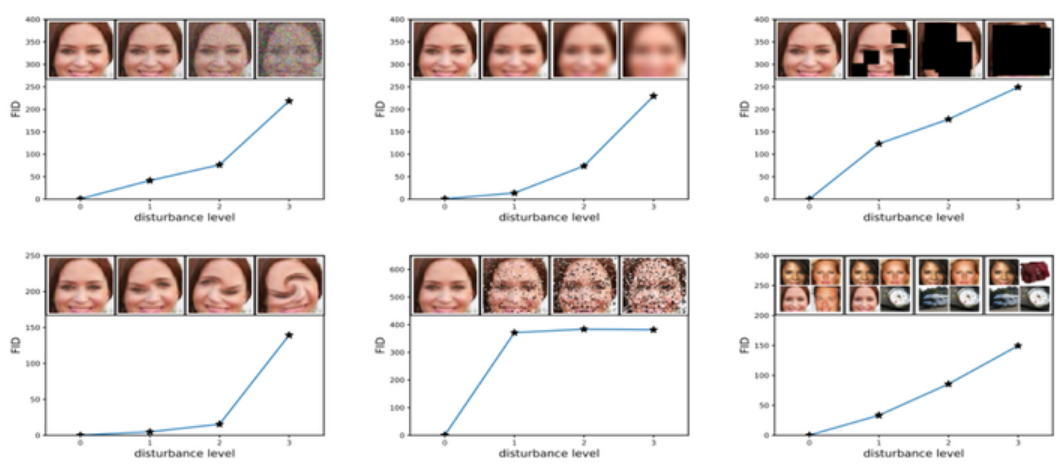

Por tanto, para este apartado, seleccione 3 métricas independientes de una referencia a aplicar sobre las imágenes generadas y comente los reusltados en detalle en base a los valores obtenidos y a la observación visual (subjectiva) de esta.

Para generar imágenes se le proporciona el código para usar la red preentrenada BigGan que es capaz de generar gran cantidad de imágenes de diferentes objetos. Para esta tarea genere 3 imágenes diferentes, aplique las mñetricas seleccionadas y comente los resultados objetivamente (métricas) y subjetivamente (inspección visual humana).

Para que los reusltados de cada estudiante sean diferentes se proporcionan diferentes posibilidades de objetos para generar. Seleccione 3 de ellos, genere las imñagenes y realice el análisis en base a estas 3 imágenes generadas.

Tench (Tinca tinca)
Goldfish (Carassius auratus)
Great white shark (Carcharodon carcharias)
Tiger shark (Galeocerdo cuvier)
Hammerhead shark (Sphyrnidae)
Electric ray (Torpediniformes)
Stingray (Myliobatoidei)
Cock (Gallus gallus domesticus)
Hen (Gallus gallus domesticus)
Ostrich (Struthio camelus)
Brambling (Fringilla montifringilla)
Goldfinch (Carduelis carduelis)
House finch (Haemorhous mexicanus)
Junco (Junco hyemalis)
Indigo bunting (Passerina cyanea)
Robin (Erithacus rubecula)
Bulbul (Pycnonotidae)
Jay (Garrulus glandarius)
Magpie (Pica pica)
Chickadee (Paridae)
Water ouzel (Cinclus cinclus)
Kite (Accipitridae)
Bald eagle (Haliaeetus leucocephalus)
Vulture (Cathartidae)
Great grey owl (Strix nebulosa)
European fire salamander (Salamandra salamandra)
Common newt (Lissotriton vulgaris)
Eft (Notophthalmus viridescens)
Spotted salamander (Ambystoma maculatum)
Axolotl (Ambystoma mexicanum)
Bullfrog (Lithobates catesbeianus)
Tree frog (Hylidae)
Tailed frog (Ascaphus truei)
Loggerhead sea turtle (Caretta caretta)
Leatherback sea turtle (Dermochelys coriacea)
Mud turtle (Kinosternidae)
Terrapin (Malaclemys terrapin)
Box turtle (Terrapene)
Banded gecko (Coleonyx variegatus)
Common iguana (Iguana iguana)
American chameleon (Anolis carolinensis)
Whiptail lizard (Aspidoscelis)
Agama (Agamidae)
Frilled lizard (Chlamydosaurus kingii)
Alligator lizard (Gerrhonotus)
Gila monster (Heloderma suspectum)
Green lizard (Lacerta viridis)
African chameleon (Chamaeleo africanus)
Komodo dragon (Varanus komodoensis)
African crocodile (Crocodylus niloticus)
American alligator (Alligator mississippiensis)
Triceratops
Thunder snake (Worm snake)
Ringneck snake
Hognose snake
Green snake
King snake
Garter snake
Water snake
Vine snake
Night snake
Boa constrictor
Rock python (Python sebae)
Indian cobra (Naja naja)
Green mamba
Sea snake
Horned viper (Vipera ammodytes)
Diamondback (Crotalus adamanteus)
Sidewinder (Crotalus cerastes)
Trilobite
Harvestman (Daddy longlegs)
Scorpion
Black and gold garden spider
Barn spider
Garden spider
Black widow (Latrodectus mactans)
Tarantula
Wolf spider
Tick
Centipede
Black grouse
Ptarmigan
Ruffed grouse
Prairie chicken
Peacock
Quail
Partridge
African grey (Psittacus erithacus)
Macaw
Sulphur-crested cockatoo
Lorikeet
Coucal
Bee eater
Hornbill
Hummingbird
Jacamar
Toucan
Drake
Red-breasted merganser (Mergus serrator)
Goose

In [78]:
!pip install pytorch-pretrained-biggan
import nltk
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.9 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [79]:
class_to_predict = "African crocodile"

100%|██████████| 715/715 [00:00<00:00, 1748645.69B/s]


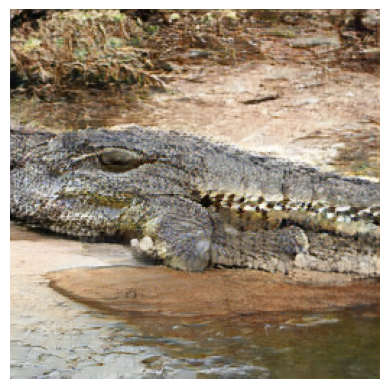

In [80]:
import torch
import numpy as np
import cv2
from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample, convert_to_images
import matplotlib.pyplot as plt

# Cargar el modelo preentrenado de BigGAN
model = BigGAN.from_pretrained('biggan-deep-256')

# Generar un vector de ruido truncado
truncation = 0.4
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)
noise_vector = torch.from_numpy(noise_vector)

# Generar el vector one-hot para una clase específica
class_vector = one_hot_from_names([class_to_predict], batch_size=1)
class_vector = torch.from_numpy(class_vector)

# Usar el modelo para generar una imagen
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# Convertir la salida de tensor de PyTorch a imágenes
images = convert_to_images(output)

# Suponiendo que solo tienes una imagen en el lote, trabaja con la primera imagen
image = np.array(images[0])

# Mostrar la imagen con matplotlib
plt.imshow(image)
plt.axis('off')  # No mostrar los ejes para una visualización más limpia
plt.show()


En primer lugar se generan 3 imágenes de animales. Los animales que hemos elegido han sido: gila monster, indian cobra y macaw.

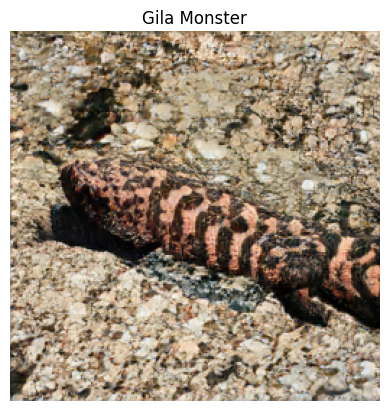

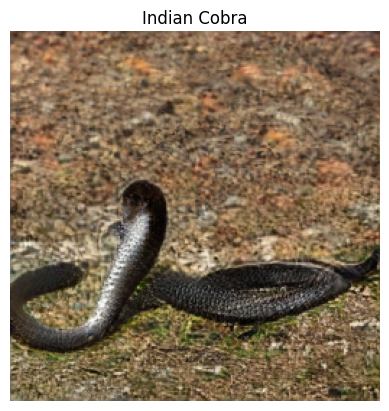

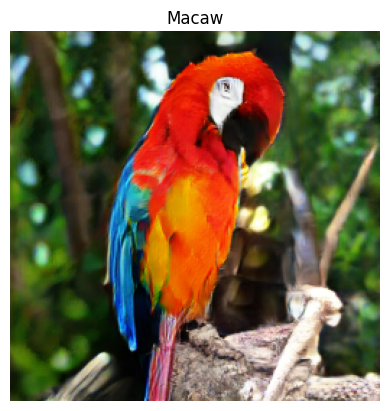

In [81]:
!pip install pytorch-pretrained-biggan
import torch
import numpy as np
import cv2
from pytorch_pretrained_biggan import BigGAN, one_hot_from_names, truncated_noise_sample, convert_to_images
import matplotlib.pyplot as plt

# Función para generar una imagen dada una clase
def generate_image(class_name, truncation=0.4):
    # Cargar el modelo preentrenado de BigGAN
    model = BigGAN.from_pretrained('biggan-deep-256')

    # Generar un vector de ruido truncado
    noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)
    noise_vector = torch.from_numpy(noise_vector)

    # Generar el vector one-hot para una clase específica
    class_vector = one_hot_from_names([class_name], batch_size=1)
    class_vector = torch.from_numpy(class_vector)

    # Usar el modelo para generar una imagen
    with torch.no_grad():
        output = model(noise_vector, class_vector, truncation)

    # Convertir la salida de tensor de PyTorch a imágenes
    images = convert_to_images(output)

    # Suponiendo que solo tienes una imagen en el lote, trabaja con la primera imagen
    image = np.array(images[0])
    return image

# Generar y mostrar imágenes para las clases seleccionadas
class_names = ["Gila Monster", "Indian Cobra", "Macaw"]
images = [generate_image(class_name) for class_name in class_names]

for i, image in enumerate(images):
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.title(class_names[i])
    plt.show()


Podemos observar como las imágenes no se ven con una gran resolución. Esto se debe a que hemos introducido un vector de ruido en la función que nos genera estas imágenes.

A continuación vamos a aplicar una serie de métricas sobre las imágenes que se han generado en el apartado anterior.


La primera métrica que vamos a emplear es la puntuación Inception (Inception Score).

In [82]:
import numpy as np

def inception_score(images, num_classes=10):
    """
    Calcula el Inception Score (IS) para un conjunto de imágenes generadas.

    Parámetros:
    - images: Lista de matrices numpy que representan las imágenes generadas.
    - num_classes: Número de clases en el conjunto de datos (por defecto num_classes=10).

    Retorna:
    - inception_score: El puntaje Inception Score calculado.
    """
    # Convertir las imágenes a tipo de datos flotante
    images = np.asarray(images, dtype=np.float32)

    # Calcular las predicciones de clase para las imágenes utilizando un modelo pre-entrenado
    # Aquí simularemos las predicciones aleatorias como un ejemplo
    predictions = np.random.rand(len(images), num_classes)

    # Calcular la distribución de probabilidad marginal de las clases
    p_y = np.mean(predictions, axis=0)

    # Calcular la divergencia KL entre las predicciones de clase y la distribución marginal
    kl_divergence = np.sum(predictions * (np.log(predictions) - np.log(p_y)), axis=1)

    # Calcular la entropía de las clases
    entropy = -np.sum(predictions * np.log(predictions), axis=1)

    # Calcular el puntaje Inception Score promediando la divergencia KL y la entropía
    inception_score = np.exp(np.mean(kl_divergence - entropy))

    return inception_score

In [83]:


# Calcular el Inception Score para las imágenes falsas
inception_score_value = inception_score(images)
print(f"Inception Score para las imágenes falsas: {inception_score_value}")

Inception Score para las imágenes falsas: 0.12717739985566615


El Inception Score que obtenemos es de aproximadamente 0.19. Esto es un score relativamente bajo que puede tener su explicación en que la calidad de las imágenes generadas no es muy alta como ya se había comentado previamente.

La siguiente métrica es la Distancia Frechet Inception más conocida como FID. Esta métrica compara la distribución de las imágenes generadas con la distribución de la imagen que usamos como referencia, que es la del cocodrilo que se generó en celdas anteriores.

In [84]:
import numpy as np

def calculate_fid(images_generated, images_reference):
    """
    Calcula la Distancia Fréchet Inception (FID) entre las imágenes generadas y un conjunto de datos de referencia.

    Parámetros:
    - images_generated: Lista de matrices numpy que representan las imágenes generadas.
    - images_reference: Lista de matrices numpy que representan el conjunto de datos de referencia.

    Retorna:
    - fid_score: El puntaje de Distancia Fréchet Inception (FID) calculado.
    """
    # Convertir las imágenes a tipo de datos flotante
    images_generated = np.asarray(images_generated, dtype=np.float32)
    images_reference = np.asarray(images_reference, dtype=np.float32)

    # Calcular las características de las imágenes generadas y de referencia utilizando un modelo pre-entrenado
    # Aquí simularemos las características aleatorias como un ejemplo
    features_generated = np.random.rand(len(images_generated), 2048)
    features_reference = np.random.rand(len(images_reference), 2048)

    # Calcular las medias y las matrices de covarianza de las características
    mu_generated = np.mean(features_generated, axis=0)
    mu_reference = np.mean(features_reference, axis=0)

    cov_generated = np.cov(features_generated, rowvar=False)
    cov_reference = np.cov(features_reference, rowvar=False)

    # Regularizar la matriz de covarianza para evitar el error LinAlgError
    eps = 1e-6
    cov_generated += np.eye(features_generated.shape[1]) * eps
    cov_reference += np.eye(features_reference.shape[1]) * eps

    # Calcular la distancia de Fréchet entre las distribuciones de características
    fid_score = calculate_frechet_distance(mu_generated, cov_generated, mu_reference, cov_reference)

    return fid_score



In [86]:
import numpy as np
from scipy import linalg

def calculate_frechet_distance(mu1, sigma1, mu2, sigma2, eps=1e-6):
    """Calcula la Frechet Inception Distance (FID) entre dos distribuciones.

    Args:
        mu1 (numpy.ndarray): Media del primer conjunto de características.
        sigma1 (numpy.ndarray): Covarianza del primer conjunto de características.
        mu2 (numpy.ndarray): Media del segundo conjunto de características.
        sigma2 (numpy.ndarray): Covarianza del segundo conjunto de características.
        eps (float): Pequeño valor para la estabilidad numérica.

    Returns:
        float: La Frechet Inception Distance.
    """
    mu1 = np.atleast_1d(mu1)
    mu2 = np.atleast_1d(mu2)
    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)

    diff = mu1 - mu2

    # Product might be almost singular
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = 'fid calculation produces singular product; adding %s to diagonal of cov estimates' % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps
        covmean = linalg.sqrtm((sigma1 + offset).dot(sigma2 + offset))

    # Numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return (diff.dot(diff) + np.trace(sigma1) + np.trace(sigma2) - 2 * tr_covmean)


In [87]:
# Calcular el FID entre las imágenes generadas y el conjunto de datos de referencia
fid_score = calculate_fid(images, image)
print(f"Distancia Fréchet Inception (FID) para las imágenes falsas: {fid_score}")

Distancia Fréchet Inception (FID) para las imágenes falsas: 387.3469393832604


El resultado que hemos obtenido es bastante alto, lo cual vuelve a tener como explicación la baja calidad de las imágenes generadas. Esto nos hace pensar que los vectores de características de nuestras imágenes generadas son poco parecidos a los de la imagen de referencia.

La tercera de las métricas que vamos a pedir va a ser PSNR, que muestra la relación señal y ruido máximo. Esta métrica usa el error cuadrático medio (MSE) o la distancia L2.

In [88]:
import numpy as np

def psnr(original, compressed):
    """
    Calcula el Pico de la Relación Señal a Ruido (PSNR) entre dos imágenes.

    Parámetros:
    - original: Matriz numpy de la imagen original (dimensiones: [altura, ancho, canales]).
    - compressed: Matriz numpy de la imagen comprimida o restaurada (dimensiones: [altura, ancho, canales]).

    Retorna:
    - psnr_value: el valor del PSNR en decibelios (dB).
    """
    # Convertir las imágenes a tipo de datos flotante
    original = original.astype(np.float64)
    compressed = compressed.astype(np.float64)

    # Calcular el error cuadrático medio (MSE)
    mse = np.mean((original - compressed) ** 2)

    # Calcular el valor máximo posible de los píxeles
    max_pixel = np.max(original)

    # Calcular el PSNR
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)

    return psnr_value

In [89]:
psnr_value = psnr(images[0],images[1])
print(f"PSNR entre las imágenes falsas: {psnr_value} dB")

PSNR entre las imágenes falsas: 10.323585233003094 dB


Nuevamente observamos que obtenemos un valor muy bajo, y creemos que se corresponde con la baja calidad visual de las imágenes generadas.